In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr                      
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
from datetime import date, time, datetime 
import pandas as pd 
import netCDF4 as net
import scipy.io

In [3]:
dataset = scipy.io.loadmat('Routine_v020721.mat')

In [4]:
print(dataset['lat'])

[[30.1647083  30.19674036 30.22876201 ... 41.78936882 41.81699553
  41.84461033]
 [30.1647083  30.19674036 30.22876201 ... 41.78936882 41.81699553
  41.84461033]
 [30.1647083  30.19674036 30.22876201 ... 41.78936882 41.81699553
  41.84461033]
 ...
 [30.1647083  30.19674036 30.22876201 ... 41.78936882 41.81699553
  41.84461033]
 [30.1647083  30.19674036 30.22876201 ... 41.78936882 41.81699553
  41.84461033]
 [30.1647083  30.19674036 30.22876201 ... 41.78936882 41.81699553
  41.84461033]]


In [38]:
print(dataset.keys())
print(np.min(dataset['lon']))
x_min = np.min(dataset['lon'])
x_max = np.max(dataset['lon'])
y_min = np.min(dataset['lat'])
y_max = np.max(dataset['lat'])
lon = dataset['lon']
lat = dataset['lat']

dict_keys(['__header__', '__version__', '__globals__', 't', 'lon', 'lat', 'adt2', 'vg2', 'ug2'])
-131.7407407407407


In [39]:
adt = dataset['adt2']
time_mean = np.mean(adt, axis = 2)


/Users/emmagurcan/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


/Users/emmagurcan/opt/anaconda3/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/Users/emmagurcan/opt/anaconda3/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


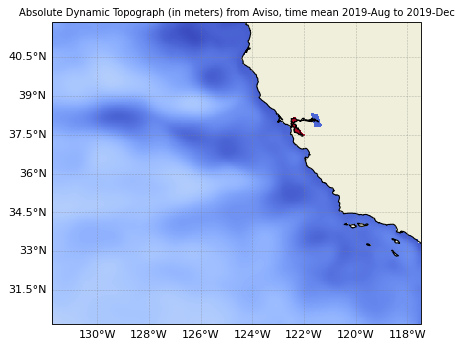

In [41]:
fig = plt.figure(figsize = (20, 5), dpi = 80)
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.set_title('Absolute Dynamic Topograph (in meters) from Aviso, time mean 2019-Aug to 2019-Dec', fontsize = 9)
ax.set_extent([x_min, x_max, y_min, y_max], crs = ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                   linewidth=.5, color='gray', alpha=0.5, linestyle='--') # include gridlines on map
gl.top_labels = False     # don't want to plot labels on top side
gl.right_labels = False 
ax.pcolormesh(lon, lat, time_mean, cmap = 'coolwarm')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE) 